### Credit Card Fraud Detection


#### Datasource
https://www.kaggle.com/datasets/kartik2112/fraud-detection

#### About the dataset
This is a simulated credit card transaction dataset containing legitimate and fraud transactions from the duration 1st Jan 2019 - 31st Dec 2020. It covers credit cards of 1000 customers doing transactions with a pool of 800 merchants.

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import datetime
import time

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_transformer
from category_encoders import JamesSteinEncoder

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,StratifiedKFold
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay,roc_curve,roc_auc_score,classification_report,balanced_accuracy_score,precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn import tree

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC,LinearSVC
from sklearn.linear_model import LogisticRegression,SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB,MultinomialNB


#### Data Analysis

In [7]:
card_transaction_df = pd.read_csv('data/fraudTrain.csv')
card_transaction_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [6]:
card_transaction_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 23 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   Unnamed: 0             1296675 non-null  int64  
 1   trans_date_trans_time  1296675 non-null  object 
 2   cc_num                 1296675 non-null  int64  
 3   merchant               1296675 non-null  object 
 4   category               1296675 non-null  object 
 5   amt                    1296675 non-null  float64
 6   first                  1296675 non-null  object 
 7   last                   1296675 non-null  object 
 8   gender                 1296675 non-null  object 
 9   street                 1296675 non-null  object 
 10  city                   1296675 non-null  object 
 11  state                  1296675 non-null  object 
 12  zip                    1296675 non-null  int64  
 13  lat                    1296675 non-null  float64
 14  long              

##### Check the Nulls count in the dataframe

In [8]:
print(card_transaction_df.isnull().sum())

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64


##### Number of fraud and non fraud transactions

In [9]:
card_transaction_df['is_fraud'].value_counts()

is_fraud
0    1289169
1       7506
Name: count, dtype: int64

In [10]:
num_unique_merchants = card_transaction_df['merchant'].nunique()
print(f"Number of unique merchants: {num_unique_merchants}")

# Unique values in 'state'
num_unique_states = card_transaction_df['state'].nunique()
print(f"Number of unique states: {num_unique_states}")

# Unique values in 'category'
num_unique_categories = card_transaction_df['category'].nunique()
print(f"Number of unique categories: {num_unique_categories}")

Number of unique merchants: 693
Number of unique states: 51
Number of unique categories: 14


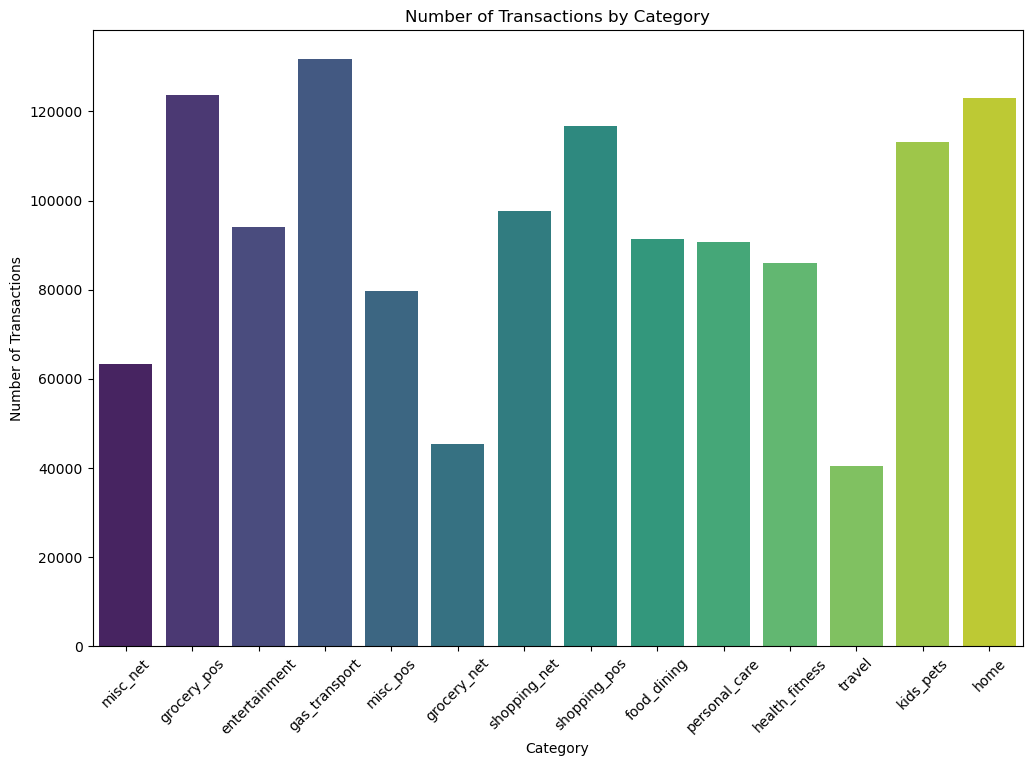

In [12]:
plt.figure(figsize=(12, 8))
sns.countplot(data=card_transaction_df, x='category', palette='viridis')
plt.xticks(rotation=45)
plt.title('Number of Transactions by Category')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.show()

#### Gas transactions are more compared to the other ones

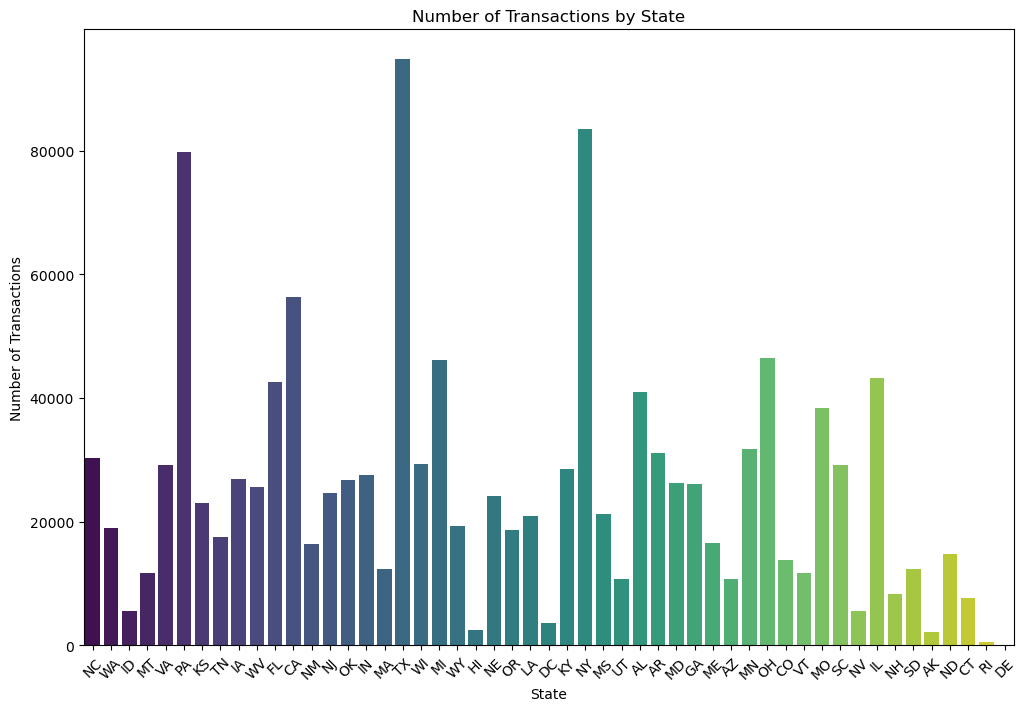

In [13]:
plt.figure(figsize=(12, 8))
sns.countplot(data=card_transaction_df, x='state', palette='viridis')
plt.xticks(rotation=45)
plt.title('Number of Transactions by State')
plt.xlabel('State')
plt.ylabel('Number of Transactions')
plt.show()


#### Transactions in Texas are more compared to other states

In [14]:
fraud_transactions_df = card_transaction_df.query("is_fraud == 1")

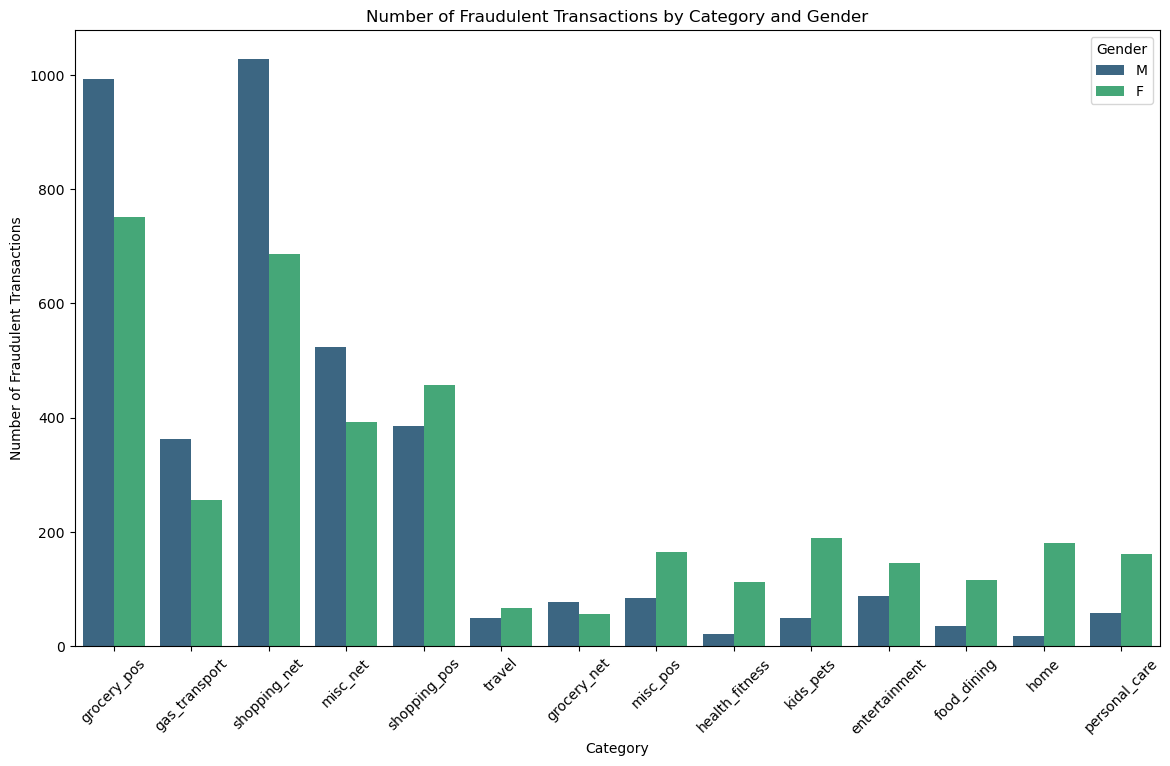

In [16]:
plt.figure(figsize=(14, 8))  # Adjust figsize as needed
sns.countplot(data=fraud_transactions_df, x='category', hue='gender', palette='viridis')

# Add titles and labels
plt.title('Number of Fraudulent Transactions by Category and Gender')
plt.xlabel('Category')
plt.ylabel('Number of Fraudulent Transactions')

# Rotate x-axis labels for better readability if needed
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Gender')
plt.show()

#### There are some categories where males have more fraudulent and some where females have more fraudulent transactions

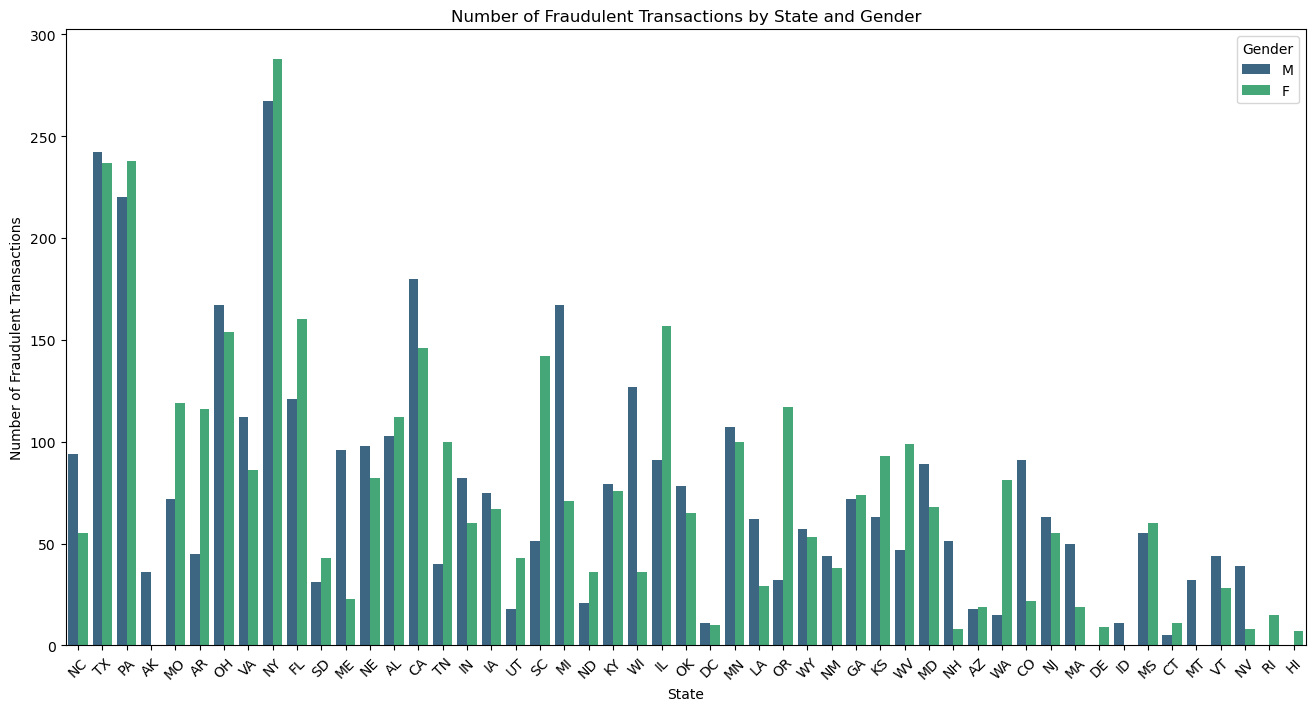

In [17]:
plt.figure(figsize=(16, 8))  # Adjust figsize as needed
sns.countplot(data=fraud_transactions_df, x='state', hue='gender', palette='viridis')

# Add titles and labels
plt.title('Number of Fraudulent Transactions by State and Gender')
plt.xlabel('State')
plt.ylabel('Number of Fraudulent Transactions')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.legend(title='Gender')
plt.show()

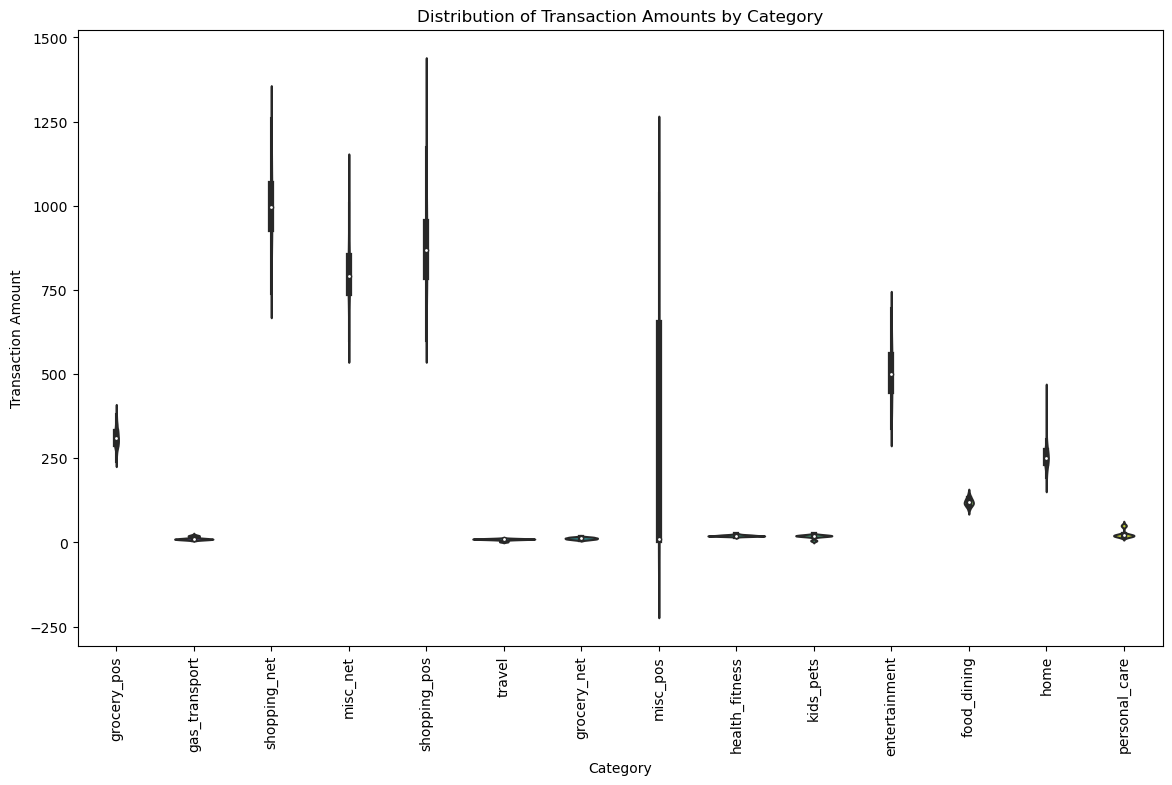

In [19]:
plt.figure(figsize=(14, 8))  # Adjust figsize as needed
sns.violinplot(data=fraud_transactions_df, x='category', y='amt', palette='viridis')

# Add titles and labels
plt.title('Distribution of Transaction Amounts by Category')
plt.xlabel('Category')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=45)
plt.show()

#### All fraudulent transactions are less than 1500

### Dropping less important columns

In [20]:
cleaned_up_df = card_transaction_df.drop(columns=['Unnamed: 0','cc_num','trans_num','first','last','merchant','zip','city_pop','street','unix_time'],axis=1)


In [21]:
# Add just the hour of the day and ignore the other time fields.
cleaned_up_df['transaction_hour'] = pd.to_datetime(card_transaction_df['trans_date_trans_time'],format="%Y-%m-%d %H:%M:%S").dt.hour
cleaned_up_df.drop('trans_date_trans_time',axis=1,inplace=True)

In [22]:
# Derive age from dob
current_year = datetime.date.today().year
cleaned_up_df['customer_age'] = current_year - pd.to_datetime(cleaned_up_df['dob']).dt.year
cleaned_up_df.drop('dob',axis=1,inplace=True)

In [24]:
cleaned_up_df.drop('city',axis=1,inplace=True)

In [25]:
X = cleaned_up_df.drop('is_fraud',axis=1)
y = cleaned_up_df['is_fraud']

### Do the encoding

In [27]:
X = JamesSteinEncoder().fit_transform(X,y)


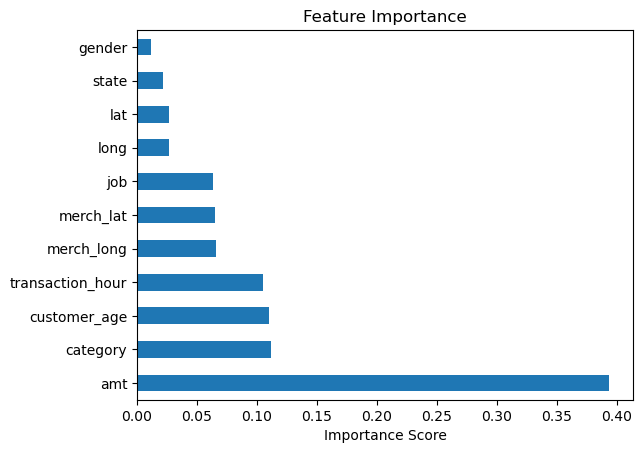

In [28]:
model = ExtraTreesClassifier(n_jobs=-1)
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance Score')
plt.show()

### Scale Features

In [30]:
X = StandardScaler().fit_transform(X)

### Running Models

* Logistic Regression
* KNN
* Decision Tree
* SVM

In [31]:
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.2,random_state=42)


In [32]:
def plot_confusion_matrix(y_test,classifier,X_test,title): 
    cm = confusion_matrix(y_test,classifier.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=classifier.classes_)
    disp.plot()
    disp.ax_.set_title(title)


def hyper_parameter_tuning(model,grid_params):
    gs = GridSearchCV(model,param_grid=grid_params, scoring="accuracy", cv=5,n_jobs=-1).fit(X_train,y_train)
    return gs

model_test_scores = {}
balanced_accuracy_scores_dict = {}
precision_dict = {}
recall_dict = {}
f1_score_dict = {}


def measure_scores(clf,X_test,y_test,model_name):
    y_preds = clf.predict(X_test)
    balanced_accuracy_scores_dict[model_name] = balanced_accuracy_score(y_test,y_preds)
    precision,recall,f1,support = precision_recall_fscore_support(y_test,y_preds,average='binary')
    precision_dict[model_name] = precision
    recall_dict[model_name] = recall
    f1_score_dict[model_name] = f1
    model_test_scores[model_name]=clf.score(X_test,y_test)

#### Logistic Regression

/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 180.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.11/site-packages/sk

LogisticRegression(n_jobs=-1)


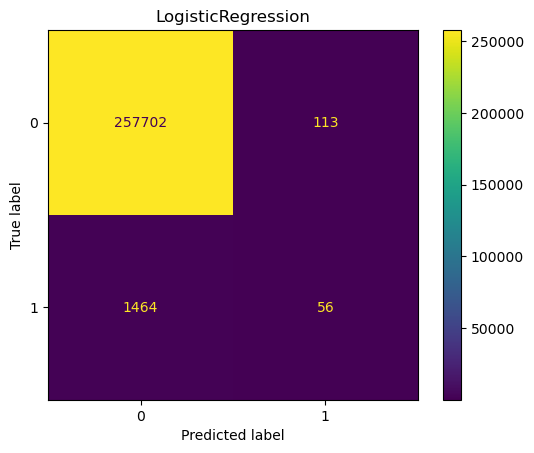

In [33]:
log_reg = LogisticRegression(n_jobs=-1)
parameters = {
    "penalty":["l1", "l2", "elasticnet"],
    "C": [0.1,0.5,1.0],
    "max_iter": [100,1000,2000,5000]
}
log_reg_gs = hyper_parameter_tuning(log_reg,parameters)
print(log_reg_gs.best_estimator_)
plot_confusion_matrix(y_test,log_reg_gs,X_test,'LogisticRegression')
measure_scores(log_reg_gs,X_test,y_test,'LogisticRegression')

In [38]:
print(f1_score_dict['LogisticRegression'],balanced_accuracy_scores_dict['LogisticRegression'])

0.06631142687981054 0.5182019032415124


#### KNN

KNeighborsClassifier(n_jobs=-1, n_neighbors=3)


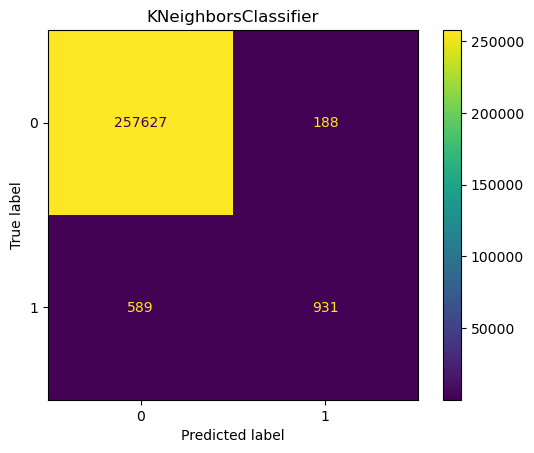

In [36]:
knn_m = KNeighborsClassifier(n_jobs=-1)
params = {
    "n_neighbors": np.array(range(1,5))
}
knn_gs = hyper_parameter_tuning(knn_m,params)
print(knn_gs.best_estimator_)
plot_confusion_matrix(y_test,knn_gs,X_test,'KNeighborsClassifier')
measure_scores(knn_gs,X_test,y_test,'KNeighborsClassifier')

In [37]:
print(f1_score_dict['KNeighborsClassifier'],balanced_accuracy_scores_dict['KNeighborsClassifier'])


0.7055702917771884 0.8058853974749336


#### Decision Tree

DecisionTreeClassifier(max_depth=10)


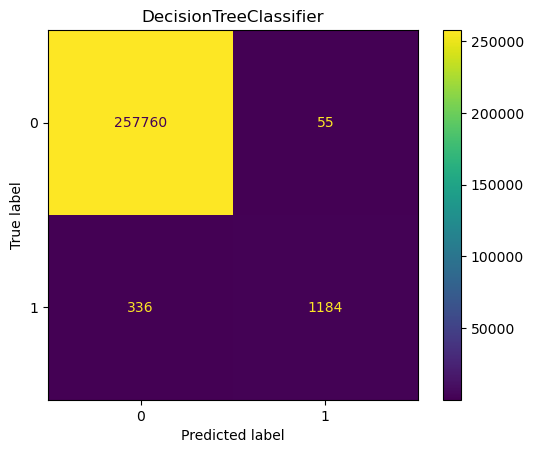

In [39]:
tree_m = DecisionTreeClassifier()
tree_parameter = {
"max_depth": np.array(range(1,15))
}
tree_gs = hyper_parameter_tuning(tree_m,tree_parameter)
print(tree_gs.best_estimator_)
plot_confusion_matrix(y_test,tree_gs,X_test,'DecisionTreeClassifier')
measure_scores(tree_gs,X_test,y_test,'DecisionTreeClassifier')

In [40]:
print(f1_score_dict['DecisionTreeClassifier'],balanced_accuracy_scores_dict['DecisionTreeClassifier'])


0.8582819862268938 0.889367018578193


#### SVM

/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:700: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/svm/

LinearSVC(C=0.1)


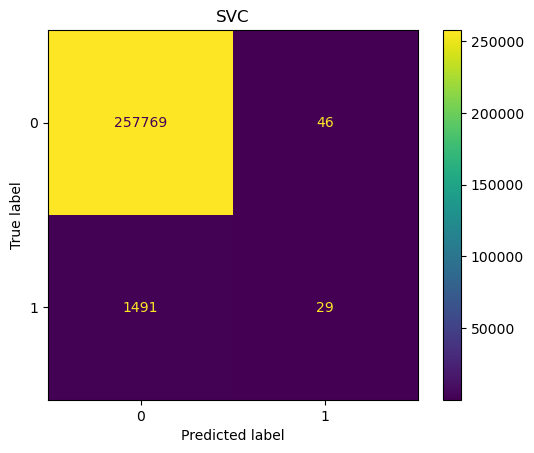

In [41]:
lsvc = LinearSVC()
l_params = {
    'C':[0.1,1.0,10,100],
    'penalty':['l1', 'l2']
}
lsvc_gs = hyper_parameter_tuning(lsvc,l_params)
print(lsvc_gs.best_estimator_)
plot_confusion_matrix(y_test,lsvc_gs,X_test,'SVC')
measure_scores(lsvc_gs,X_test,y_test,'SVC')

In [42]:
print(f1_score_dict['SVC'],balanced_accuracy_scores_dict['SVC'])


0.03636363636363637 0.5094502624280772


#### Score comparision

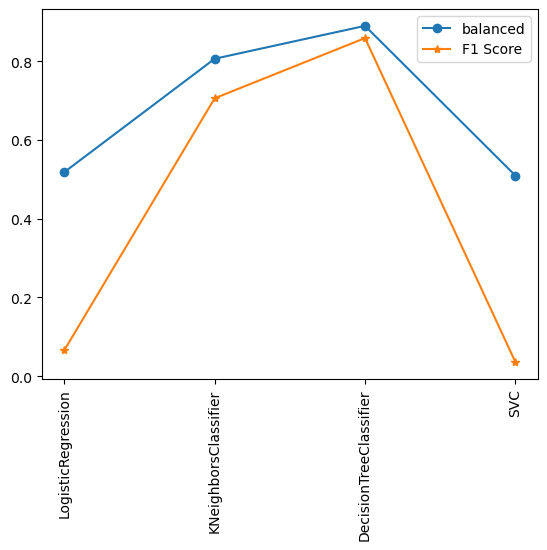

In [44]:
plt.plot(balanced_accuracy_scores_dict.keys(),balanced_accuracy_scores_dict.values(),label='balanced',marker='o')
plt.plot(f1_score_dict.keys(),f1_score_dict.values(),label='F1 Score',marker='*')
plt.xticks(rotation=90)
plt.legend()
plt.show()

##### Decision Tree has better scores compared to the other ones

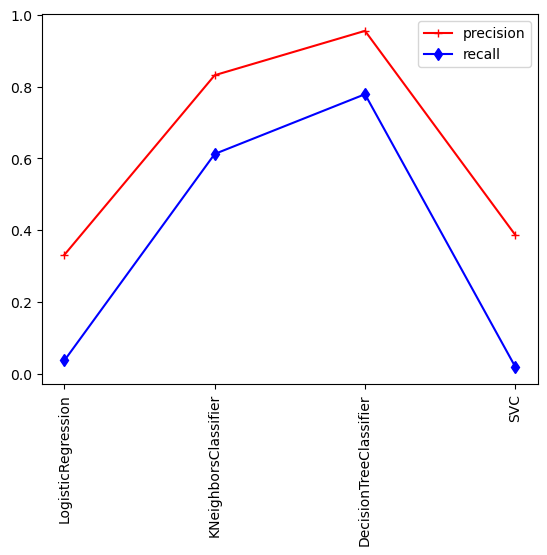

In [45]:
plt.plot(precision_dict.keys(),precision_dict.values(),label='precision',marker='+',color='r')
plt.plot(recall_dict.keys(),recall_dict.values(),label='recall',marker = 'd',color='b')
plt.xticks(rotation=90)
plt.legend()
plt.show()

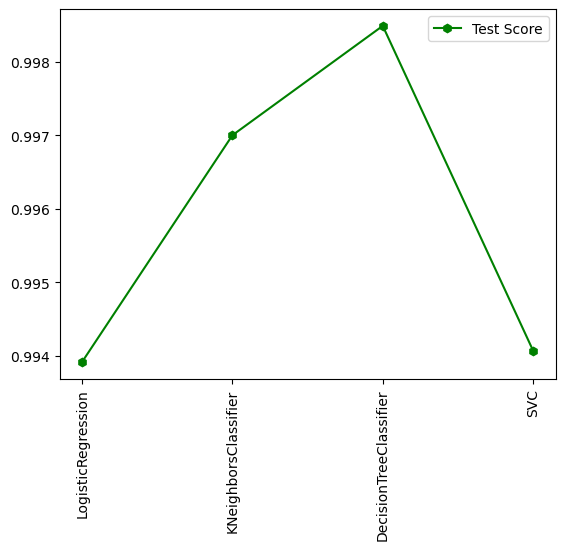

In [46]:
plt.plot(model_test_scores.keys(),model_test_scores.values(),label='Test Score',marker='h',color='g')
plt.xticks(rotation=90)
plt.legend()
plt.show()

#### Next Steps
Use the ensemble techniques and other neural network models 